In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [78]:
data = pd.read_csv('train_triplets.txt', sep="\t", header = None,)



In [28]:
def f(row):
    if row['Count'] >= 10:
        val = '>=10'
    else:
        val = row['Count']
    return val
data['UniqueCount'] = data.apply(f, axis=1)

In [16]:
data.to_csv('NewDF.csv', index=False)

In [13]:
data2= data
data2 = pd.read_csv('NewDF.csv')


In [31]:
data2['UniqueCount'] = data2['UniqueCount'].astype('category')
TestSet = data2[0:10000]


In [81]:
print "The number of combinations is:", format(len(data2),",d")
print "The number of unique Users is:",format(len(set(data2.User_ID)),",d")
print "The number of unique Songs is:",format(len(set(data2.Song_ID)), ",d")
print "Unique Counts:",format(len(set(data2.Count)),",d")


The number of combinations is: 48,373,586
The number of unique Users is: 1,019,318
The number of unique Songs is: 384,546
Unique Counts: 720


In [82]:
print "The number of unique Songs in TestSet is:",format(len(set(TestSet.Song_ID)), ",d")
print "The number of unique Users in Test Set is:",format(len(set(TestSet.User_ID)),",d")
print "The number of combinations in Test Set is:", format(len(TestSet),",d")

The number of unique Songs in TestSet is: 7,849
The number of unique Users in Test Set is: 173
The number of combinations in Test Set is: 10,000


In [27]:
def GreaterThanOne(row):
    if row['Count'] > 1:
        val = 1
    else:
        val = 0
    return val
data2['G1'] = data2.apply(GreaterThanOne, axis=1)

In [15]:
#data2.to_csv('NewDF2.csv', index=False)
data2 = pd.read_csv('NewDF2.csv')

In [10]:
#Full Model
UCS = data2[['User_ID', 'Song_ID']].groupby(['User_ID']).agg(['count'])
SCU = data2[['Song_ID', 'User_ID']].groupby(['Song_ID']).agg(['count'])
#Test Model
UCS2 = TestSet[['User_ID', 'Song_ID']].groupby(['User_ID']).agg(['count'])
SCU2 = TestSet[['Song_ID', 'User_ID']].groupby(['Song_ID']).agg(['count'])

In [7]:
#UCS.to_csv('UCS.csv', index=False)
#SCU.to_csv('SCU.csv', index=False)
UCS = pd.read_csv('UCS.csv')
SCU = pd.read_csv('SCU.csv')


In [83]:
print "Count of the frequency each song is listened to"
print "ex: 28755966 songs are listened to once, 2477559 songs are listened to ten times or more"
print data2.UniqueCount.value_counts()


1       28755966
2        7336825
3        3214271
>=10     2477559
5        2250999
4        1805081
6        1004971
7         675413
8         488641
9         363860
Name: UniqueCount, dtype: int64


In [88]:
print "Count of the frequency each song is listened to"
print "0 means that person listened to song 1 time,"
print "1 means that person listened to song more than 1 times"
print data2.G1.value_counts()

Count of the frequency each song is listened to
0 means that person listened to song 1 time,
1 means that person listened to song more than 1 times
0    28755966
1    19617620
Name: G1, dtype: int64


In [89]:
print 'Summary Statistics on Number of Unique Users that Listens to a Song'
print 'ex: On Average each song is listened to by 125.79 users or 50% of songs are listened to by 13 users'
print SCU.describe()
print
print
print 'Summary Statistics on Number of Unique Songs Each User Listens To'
print 'ex: On Average each user listens to 47 unique songs or 50% of users listen to 27 unique songs'
print UCS.describe()


Summary Statistics on Number of Unique Users that Listens to a Song
ex: On Average each song is listened to by 125.79 users or 50% of songs are listened to by 13 users
             User_ID
               count
count  384546.000000
mean      125.794017
std       799.025834
min         1.000000
25%         4.000000
50%        13.000000
75%        52.000000
max    110479.000000


Summary Statistics on Number of Unique Songs Each User Listens To
ex: On Average each user listens to 47 unique songs or 50% of users listen to 27 unique songs
            Song_ID
              count
count  1.019318e+06
mean   4.745682e+01
std    5.781573e+01
min    1.000000e+01
25%    1.600000e+01
50%    2.700000e+01
75%    5.500000e+01
max    4.400000e+03


In [87]:
print "Count of the Y number of users that listen to X number of unique songs"
print "ex: 50608 users listen to 10 unique songs"
UCS.Song_ID['count'].value_counts()

Count of the Y number of users that listen to X number of unique songs
ex: 50608 users listen to 10 unique songs


10      50608
11      46219
12      42170
13      38721
14      35585
15      33065
16      30834
17      28662
18      26931
19      25420
20      23627
21      22268
22      20679
23      19546
24      18646
25      17473
26      16836
27      15770
28      14943
29      14372
30      13814
31      12887
32      12566
33      11652
34      11352
35      10774
36      10402
37      10004
38       9713
39       9237
        ...  
961         1
763         1
918         1
1105        1
1124        1
915         1
875         1
877         1
881         1
884         1
1398        1
887         1
888         1
890         1
1116        1
894         1
1114        1
895         1
898         1
676         1
904         1
905         1
907         1
1108        1
911         1
677         1
913         1
1106        1
784         1
726         1
Name: count, dtype: int64

In [86]:
print "Count of the Y Number of songs listend by X number of person(s)"
print "ex: 31781 songs are listened to by one person"
SCU.User_ID['count'].value_counts()

Count of the Y Number of songs listend by X number of person(s)
ex: 31781 songs are listened to by one person


1        31781
2        26516
3        22192
4        18996
5        16354
6        14477
7        12287
8        11048
9         9679
10        8689
11        7860
12        7308
13        6565
14        5916
15        5474
16        5019
17        4815
18        4312
19        4085
20        3824
21        3683
22        3402
23        3171
24        3128
25        3014
26        2756
27        2674
28        2527
29        2342
30        2278
         ...  
2771         1
6743         1
4944         1
3026         1
3761         1
5200         1
7120         1
2514         1
4561         1
2130         1
4305         1
4433         1
10582        1
2002         1
2898         1
8145         1
3154         1
3795         1
11350        1
2197         1
5713         1
3666         1
1875         1
5810         1
1968         1
3027         1
5521         1
6487         1
25310        1
3539         1
Name: count, dtype: int64

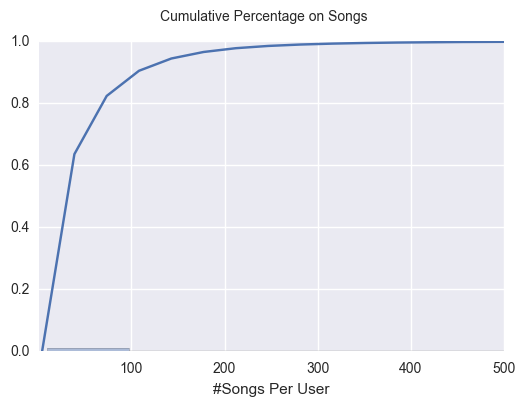

In [77]:
UCSCDF = sns.distplot(UCS.Song_ID['count'],
                      kde_kws=dict(cumulative=True))
plt.xlim(1, 500)
plt.xlabel('#Songs Per User')
plt.suptitle('Cumulative Percentage on Songs')
plt.show()

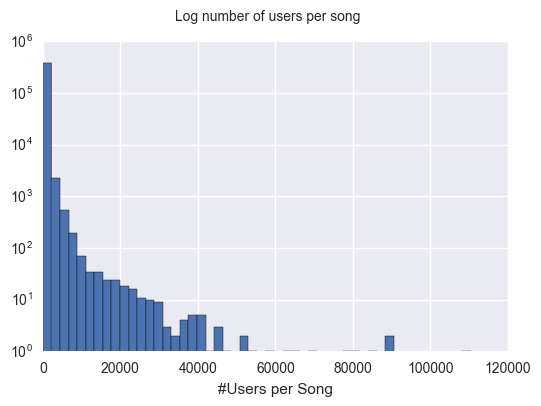

In [84]:
SCUCDF = plt.hist(SCU.User_ID['count'],
                      bins = 50)
#plt.xlim(0, 5000)

plt.yscale('log', nonposy='clip')

plt.xlabel('#Users per Song')
plt.suptitle('Log number of users per song')
plt.show()


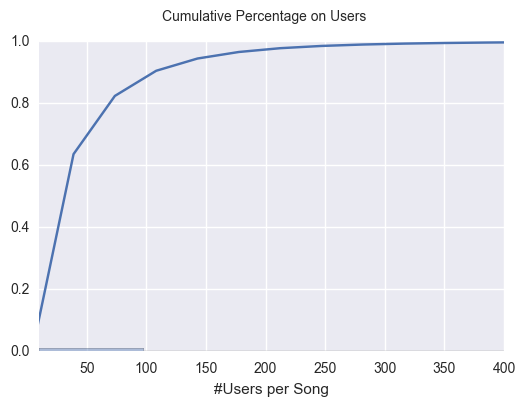

In [76]:
UCSCDF = sns.distplot(UCS.Song_ID['count'],
                      kde_kws=dict(cumulative=True))

plt.xlim(10, 400)



plt.xlabel('#Users per Song')
plt.suptitle('Cumulative Percentage on Users')
plt.show()
